# Importowanie bibliotek

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Generowanie próbek

In [ ]:
SIZE = 1000

data_uniform = np.random.uniform(0, 1, SIZE)
df_uniform = pd.DataFrame(data_uniform, columns=['Uniform'])
print(df_uniform.head())

print('--------------------')

data_normal = np.random.normal(0, 1, SIZE)
df_normal = pd.DataFrame(data_normal, columns=['Normal'])
print(df_normal.head())

    Uniform
0  0.927513
1  0.048157
2  0.549754
3  0.566591
4  0.738783
--------------------
     Normal
0 -0.130581
1  0.198995
2  0.811039
3 -0.800353
4  0.028495


# Podstawowe statystyki próbek

In [ ]:
print(df_uniform.describe())

print('--------------------')

print(df_normal.describe())

           Uniform
count  1000.000000
mean      0.510449
std       0.287489
min       0.000865
25%       0.269654
50%       0.512774
75%       0.753952
max       0.999238
--------------------
            Normal
count  1000.000000
mean     -0.054141
std       1.030596
min      -3.552364
25%      -0.744139
50%      -0.043646
75%       0.657999
max       3.041399


# Tworzenie serii mniejszych próbek

In [ ]:
def create_subsets(df):
  subset_percentages = [0.1 * i for i in range (2, 11)]
  subset_sizes = [int(len(df)* percentage) for percentage in subset_percentages]
  return [df.head(subset_size) for subset_size in subset_sizes]

subsets_uniform = create_subsets(df_uniform)
subsets_normal = create_subsets(df_normal)

# Podstawowe statystyki dla serii mniejszych próbek

In [ ]:
def describe_subsets(subsets):
  subset_list = [subset.describe().transpose() for subset in subsets]
  return pd.concat(subset_list).reset_index(drop=True)

print('Uniform subsets statistics')
subsets_uniform_describe = describe_subsets(subsets_uniform)
print(subsets_uniform_describe)

print("---------------------------------------------------------")

print('Normal subsets statistics')
subsets_normal_describe = describe_subsets(subsets_normal)
print(subsets_normal_describe)

Uniform subsets statistics
    count      mean       std       min       25%       50%       75%  \
0   200.0  0.505744  0.298061  0.001906  0.256539  0.491479  0.772737   
1   300.0  0.512642  0.294587  0.001906  0.268387  0.499283  0.771717   
2   400.0  0.506363  0.292183  0.001906  0.259973  0.494580  0.756503   
3   500.0  0.508328  0.294261  0.001906  0.259973  0.496277  0.763951   
4   600.0  0.510750  0.290254  0.001906  0.271345  0.504812  0.763033   
5   700.0  0.511159  0.286768  0.000865  0.276601  0.500510  0.755796   
6   800.0  0.512438  0.287897  0.000865  0.276601  0.512774  0.757757   
7   900.0  0.510220  0.287660  0.000865  0.270922  0.509909  0.754663   
8  1000.0  0.510449  0.287489  0.000865  0.269654  0.512774  0.753952   

        max  
0  0.994141  
1  0.994141  
2  0.998790  
3  0.998790  
4  0.999238  
5  0.999238  
6  0.999238  
7  0.999238  
8  0.999238  
---------------------------------------------------------
Normal subsets statistics
    count      mea

# Wypełnienie mniejszych próbek średnią arytmetyczną

In [ ]:
def fill_with_mean(subsets):
    subsets_expanded = []

    for subset in subsets:
      column_name = subset.columns[0]
      subset_expanded = pd.DataFrame(index = range(SIZE))
      subset_expanded[column_name] = subset.iloc[:, 0].copy()

      subset_expanded[column_name].fillna(subset[column_name].mean(), inplace=True)
      subsets_expanded.append(subset_expanded)

    return subsets_expanded

subsets_uniform_mean_filled = fill_with_mean(subsets_uniform)
subsets_normal_mean_filled = fill_with_mean(subsets_normal)

# Wypełnienie mniejszych próbek medianą

In [ ]:
def fill_with_median(subsets):
    subsets_expanded = []

    for subset in subsets:
      column_name = subset.columns[0]
      subset_expanded = pd.DataFrame(index = range(SIZE))
      subset_expanded[column_name] = subset.iloc[:, 0].copy()

      subset_expanded[column_name].fillna(subset[column_name].median(), inplace=True)
      subsets_expanded.append(subset_expanded)

    return subsets_expanded

subsets_uniform_median_filled = fill_with_median(subsets_uniform)
subsets_normal_median_filled = fill_with_median(subsets_normal)

# Wypełnienie mniejszych próbek losowymi wartościami z rozkładu normalnego

In [ ]:
def fill_with_random_normal(subsets):
    subsets_expanded = []

    for subset in subsets:
        column_name = subset.columns[0]
        subset_expanded = pd.DataFrame(index = range(SIZE))
        subset_expanded[column_name] = subset.iloc[:, 0].copy()

        mean_sample = subset[column_name].mean()
        std_sample = subset[column_name].std()

        missing_values = subset_expanded[column_name].isnull()
        num_missing_values = missing_values.sum()
        random_values = np.random.normal(mean_sample, std_sample, num_missing_values)

        subset_expanded.loc[missing_values, column_name] = random_values
        subsets_expanded.append(subset_expanded)

    return subsets_expanded

subsets_normal_random_filled = fill_with_random_normal(subsets_normal)

# Wypełnienie mniejszych próbek losowymi wartościami z rozkładu jednostajnego

In [ ]:
def fill_with_random_uniform(subsets):
    subsets_expanded = []

    for subset in subsets:
        column_name = subset.columns[0]
        subset_expanded = pd.DataFrame(index = range(SIZE))
        subset_expanded[column_name] = subset.iloc[:, 0].copy()


        mean_sample = subset[column_name].mean()
        std_sample = subset[column_name].std()
        min_estimator = mean_sample - 3 * std_sample
        max_estimator = mean_sample + 3 * std_sample

        missing_values = subset_expanded[column_name].isnull()
        num_missing_values = missing_values.sum()
        random_values = np.random.uniform(min_estimator, max_estimator, num_missing_values)

        subset_expanded.loc[missing_values, column_name] = random_values
        subsets_expanded.append(subset_expanded)

    return subsets_expanded

subsets_uniform_random_filled = fill_with_random_uniform(subsets_uniform)

# Podstawowe statystyki dla wypełnionych danych

In [ ]:
subsets_uniform_mean_filled_describe = describe_subsets(subsets_uniform_mean_filled)
subsets_normal_mean_filled_descirbe = describe_subsets(subsets_normal_mean_filled)

subsets_uniform_median_filled_describe = describe_subsets(subsets_uniform_median_filled)
subsets_normal_median_filled_describe = describe_subsets(subsets_normal_mean_filled)

subsets_uniform_random_filled_describe = describe_subsets(subsets_uniform_random_filled)
subsets_normal_random_filled_describe = describe_subsets(subsets_normal_random_filled)

print('Uniform subsets filled with mean')
print(subsets_uniform_mean_filled_describe)
print("---------------------------------------------------------")

print('Normal subsets filled with mean')
print(subsets_normal_mean_filled_descirbe)
print("---------------------------------------------------------")

print('Uniform subsets filled with median')
print(subsets_uniform_median_filled_describe)
print("---------------------------------------------------------")

print('Normal subsets filled with median')
print(subsets_normal_median_filled_describe)
print("---------------------------------------------------------")

print('Uniform subsets filled with random values')
print(subsets_uniform_random_filled_describe)
print("---------------------------------------------------------")

print('Normal subsets filled with random values')
print(subsets_normal_random_filled_describe)
print("---------------------------------------------------------")

Uniform subsets filled with mean
    count      mean       std       min       25%       50%       75%  \
0  1000.0  0.505744  0.133030  0.001906  0.505744  0.505744  0.505744   
1  1000.0  0.512642  0.161164  0.001906  0.512642  0.512642  0.512642   
2  1000.0  0.506363  0.184654  0.001906  0.506363  0.506363  0.506363   
3  1000.0  0.508328  0.207970  0.001906  0.496477  0.508328  0.508328   
4  1000.0  0.510750  0.224755  0.001906  0.426580  0.510750  0.598147   
5  1000.0  0.511159  0.239876  0.000865  0.386564  0.511159  0.666564   
6  1000.0  0.512438  0.257471  0.000865  0.342175  0.512438  0.709727   
7  1000.0  0.510220  0.272883  0.000865  0.302121  0.510220  0.734923   
8  1000.0  0.510449  0.287489  0.000865  0.269654  0.512774  0.753952   

        max  
0  0.994141  
1  0.994141  
2  0.998790  
3  0.998790  
4  0.999238  
5  0.999238  
6  0.999238  
7  0.999238  
8  0.999238  
---------------------------------------------------------
Normal subsets filled with mean
    co

# Dodanie kolumny z procentową zawartością braków danych

In [ ]:
def add_mising_percentage(df):
    df['Missing percentage'] = df.index.map(lambda i: 80 - 10 * i)
    return df

# Wizualizacje statystyk pozycyjnych

In [ ]:
def visualize_positonal_statistics(df, title):
    df = add_mising_percentage(df)

    fig, axs = plt.subplots(2, 3, figsize=(15, 10))

    axs[0, 0].plot(df['Missing percentage'], df['mean'])
    axs[0, 0].set_title(title + ' - średnia')

    axs[0, 1].plot(df['Missing percentage'], df['min'])
    axs[0, 1].set_title(title + ' - minimum')

    axs[0, 2].plot(df['Missing percentage'], df['25%'])
    axs[0, 2].set_title(title + ' - 25 percentyl')

    axs[1, 0].plot(df['Missing percentage'], df['50%'])
    axs[1, 0].set_title(title + ' - 50 percentyl')

    axs[1, 1].plot(df['Missing percentage'], df['75%'])
    axs[1, 1].set_title(title + ' - 75% percentyl')

    axs[1, 2].plot(df['Missing percentage'], df['max'])
    axs[1, 2].set_title(title + ' - maksimum')

    for ax in axs.flat:
        ax.set_xlabel('% brakujących danych')
        ax.set_ylabel('wartość')

    plt.subplots_adjust(wspace=5, hspace=5)
    plt.tight_layout()
    plt.show()

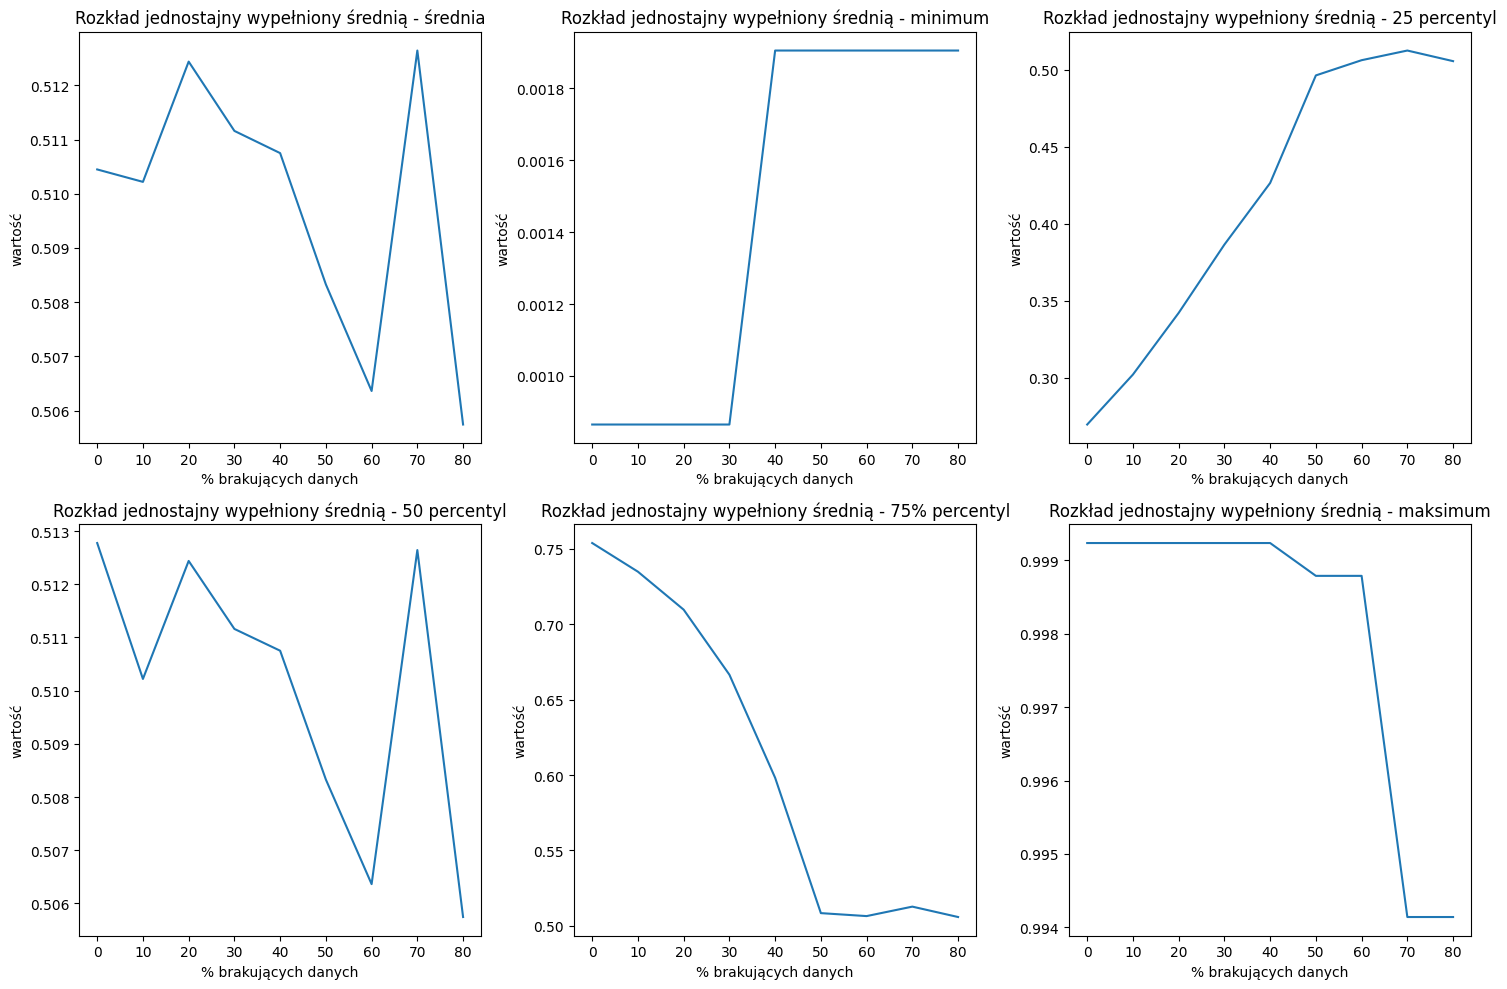

In [ ]:
visualize_positonal_statistics(subsets_uniform_mean_filled_describe,'Rozkład jednostajny wypełniony średnią')

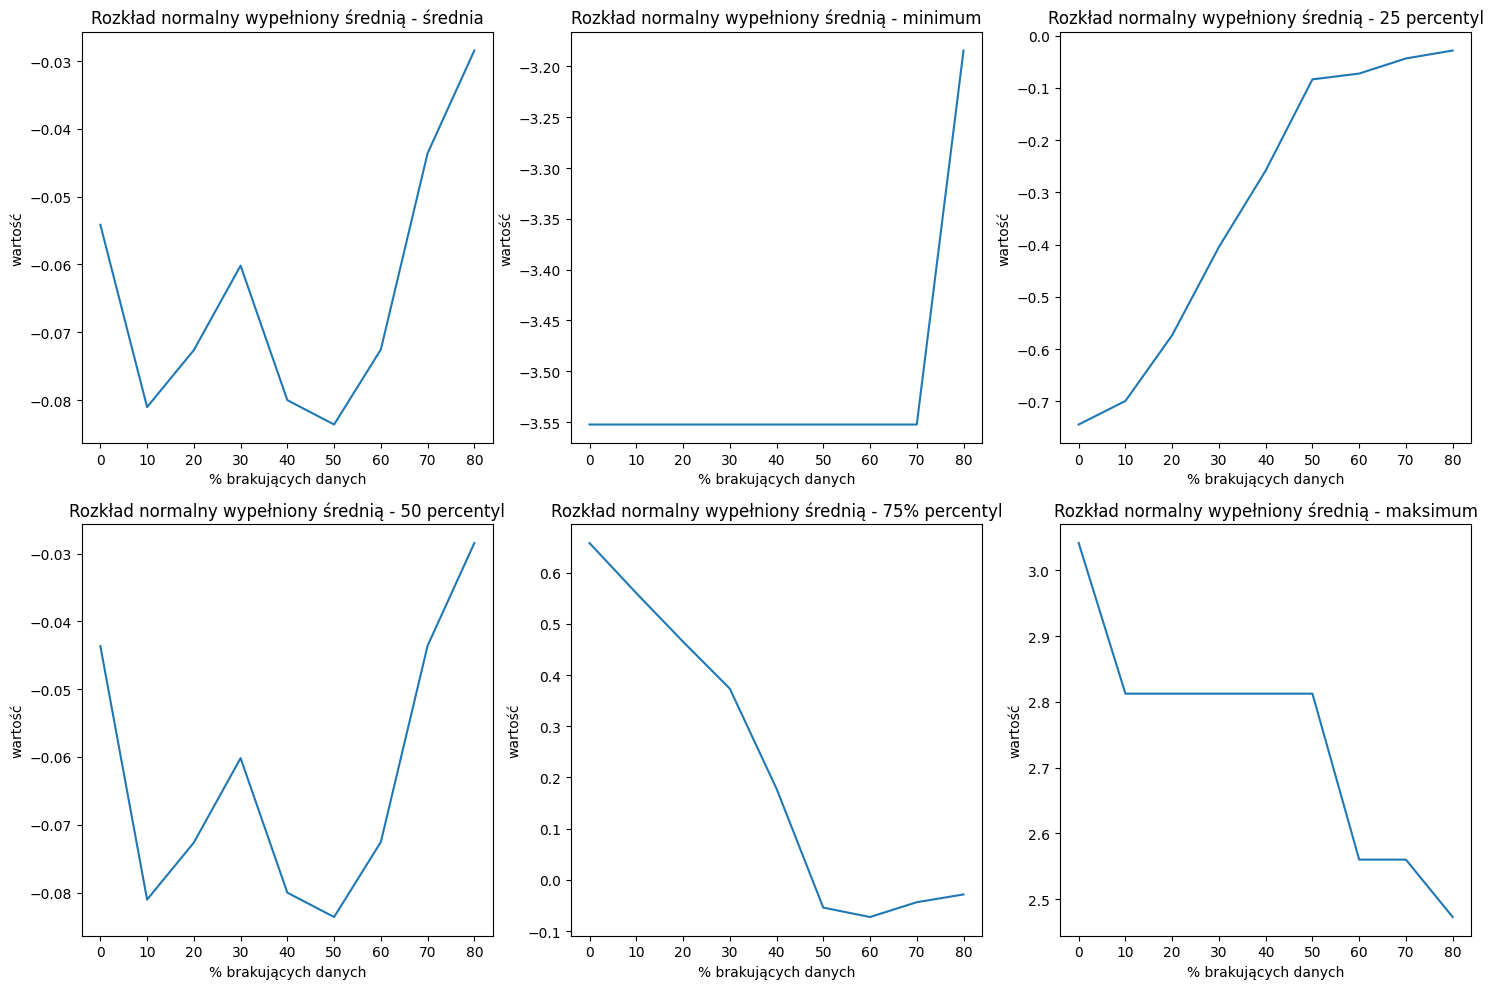

In [ ]:
visualize_positonal_statistics(subsets_normal_mean_filled_descirbe,'Rozkład normalny wypełniony średnią')

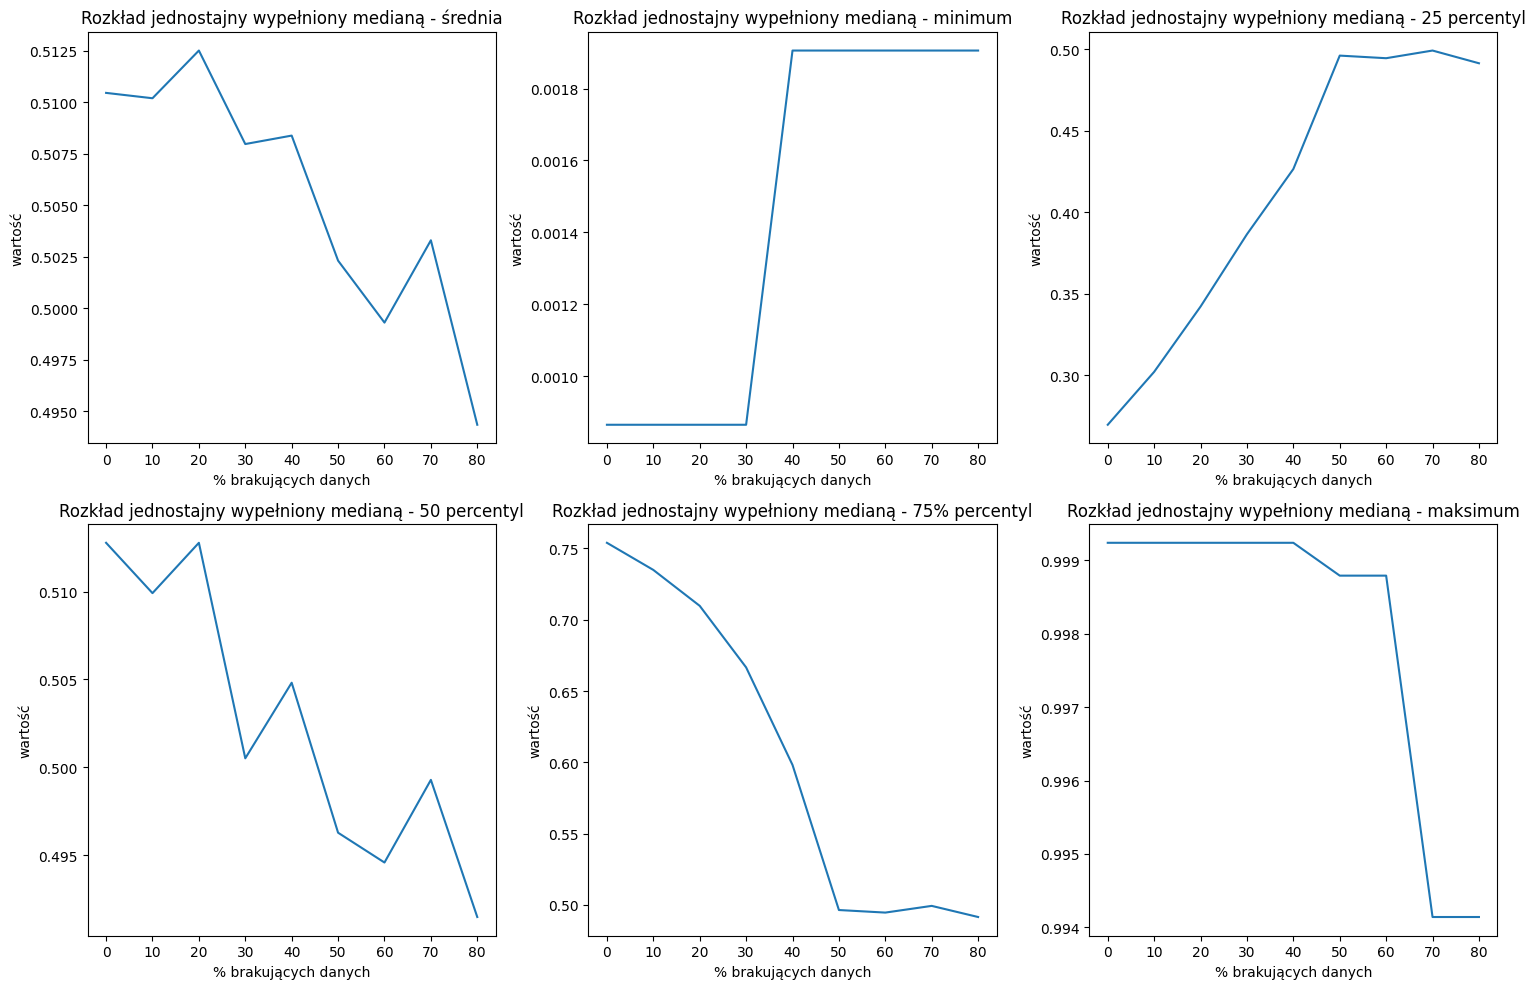

In [ ]:
visualize_positonal_statistics(subsets_uniform_median_filled_describe,'Rozkład jednostajny wypełniony medianą')

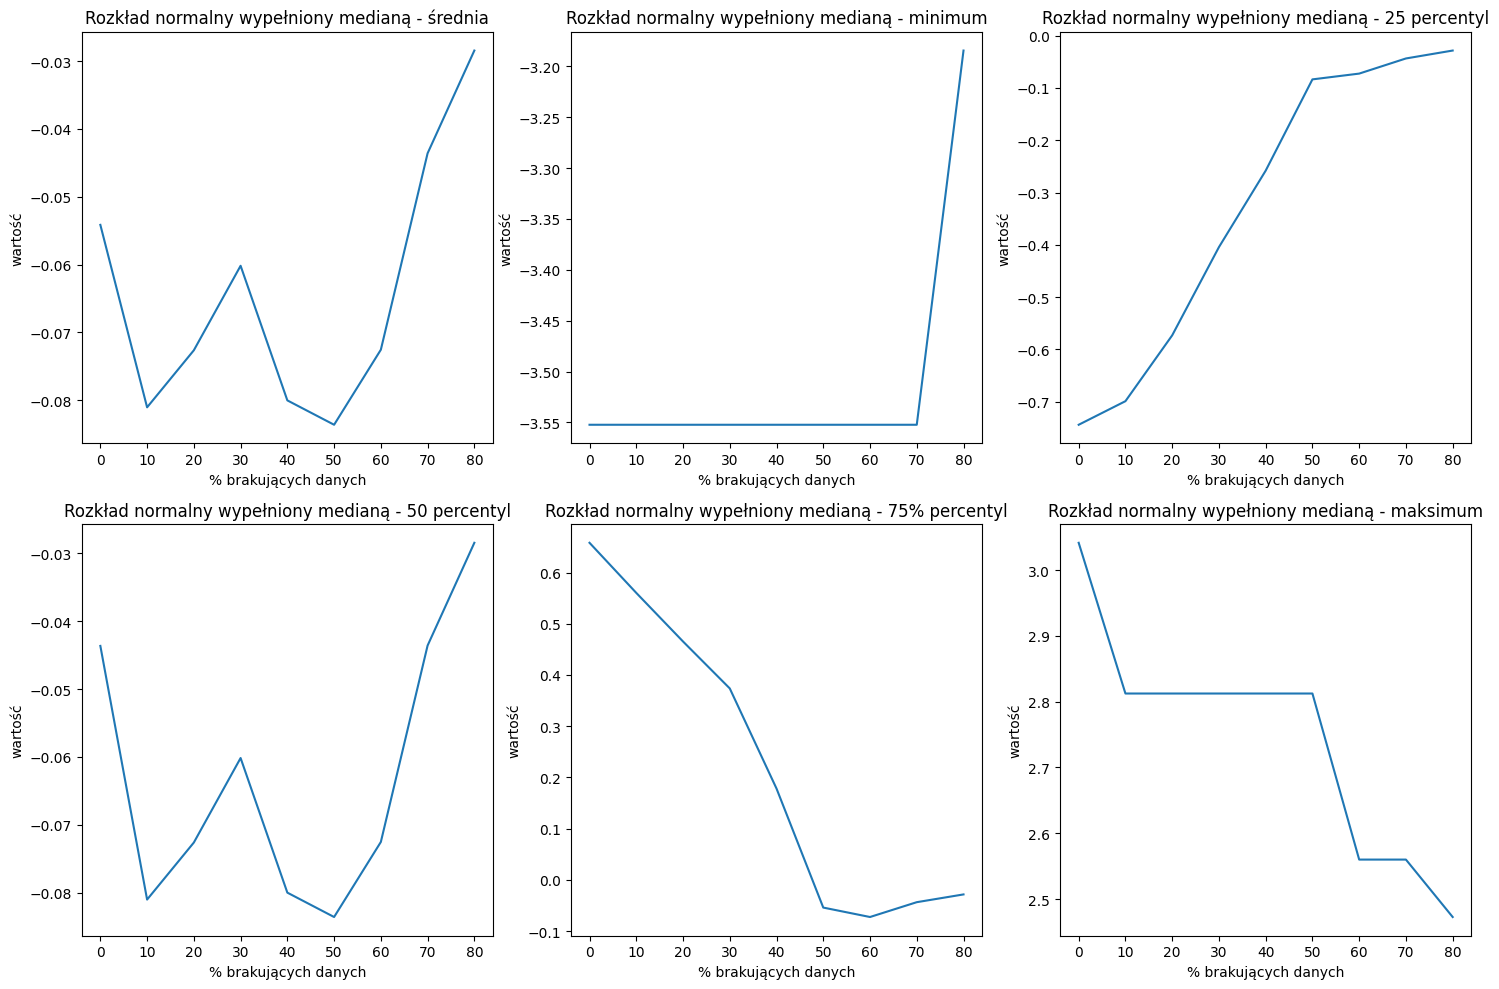

In [ ]:
visualize_positonal_statistics(subsets_normal_median_filled_describe,'Rozkład normalny wypełniony medianą')

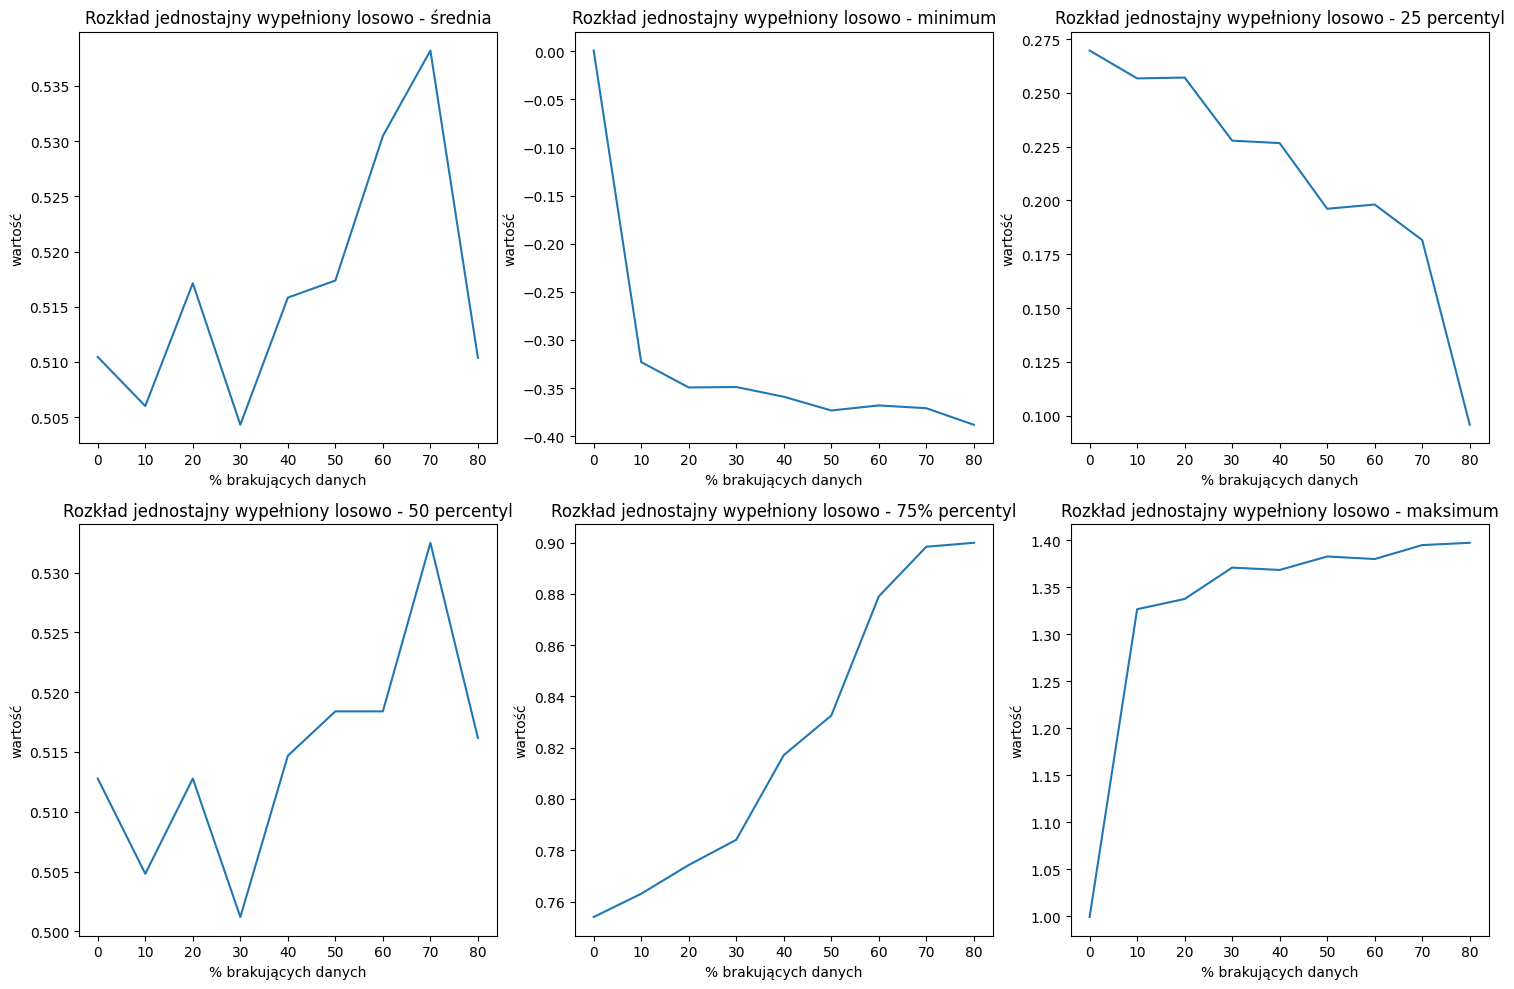

In [ ]:
visualize_positonal_statistics(subsets_uniform_random_filled_describe,'Rozkład jednostajny wypełniony losowo')

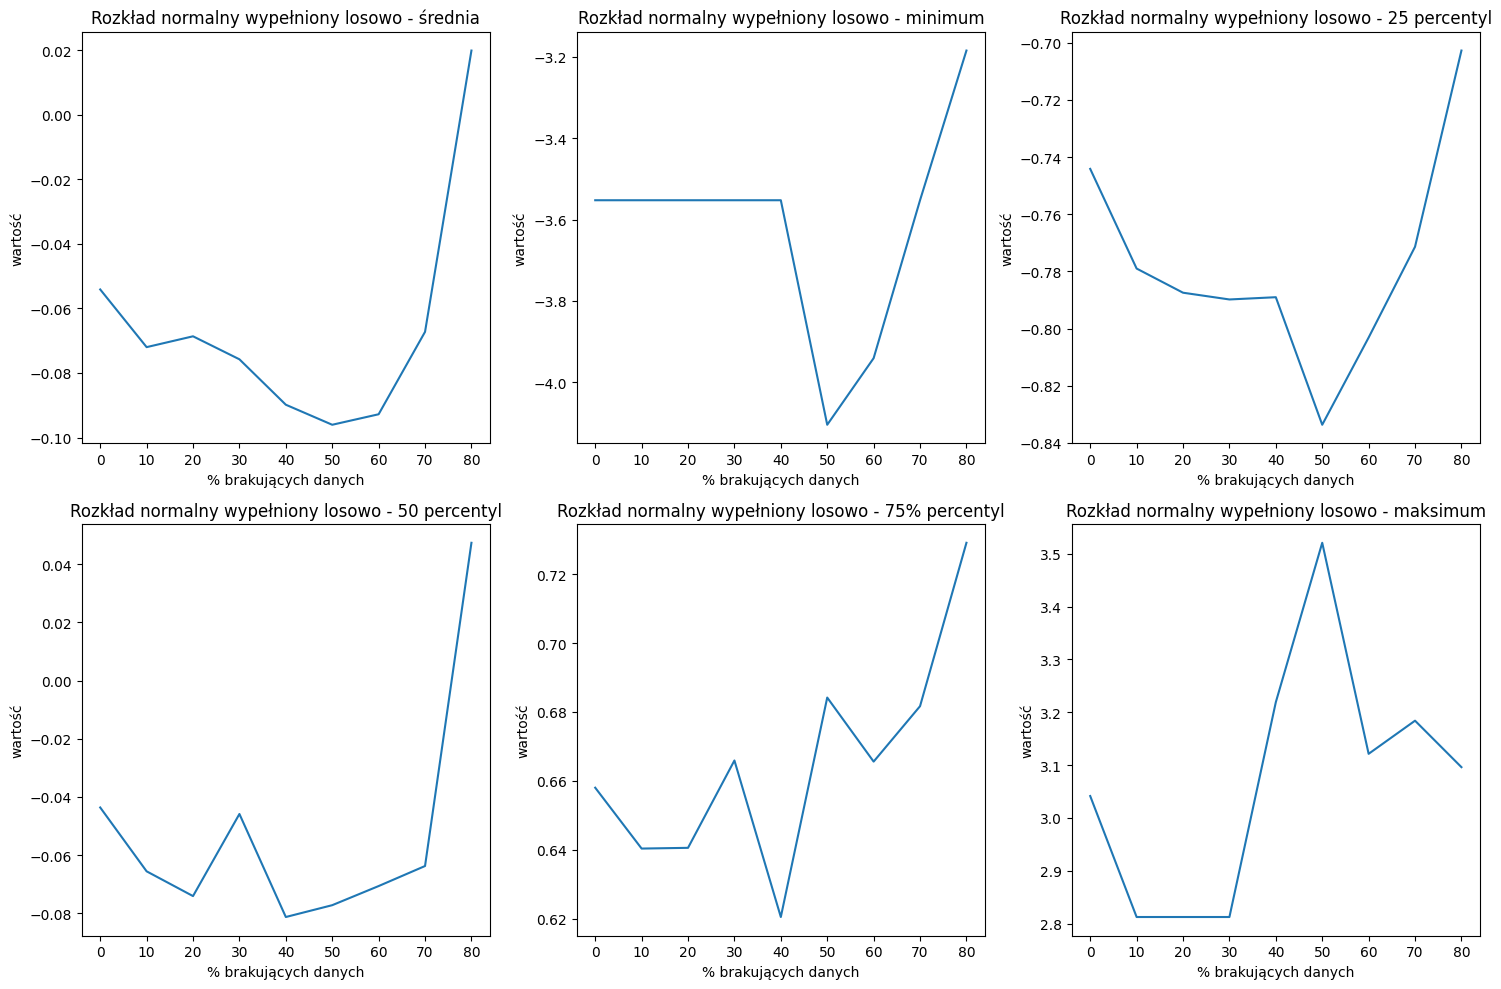

In [ ]:
visualize_positonal_statistics(subsets_normal_random_filled_describe,'Rozkład normalny wypełniony losowo')

# Wizualizacja rozproszenia

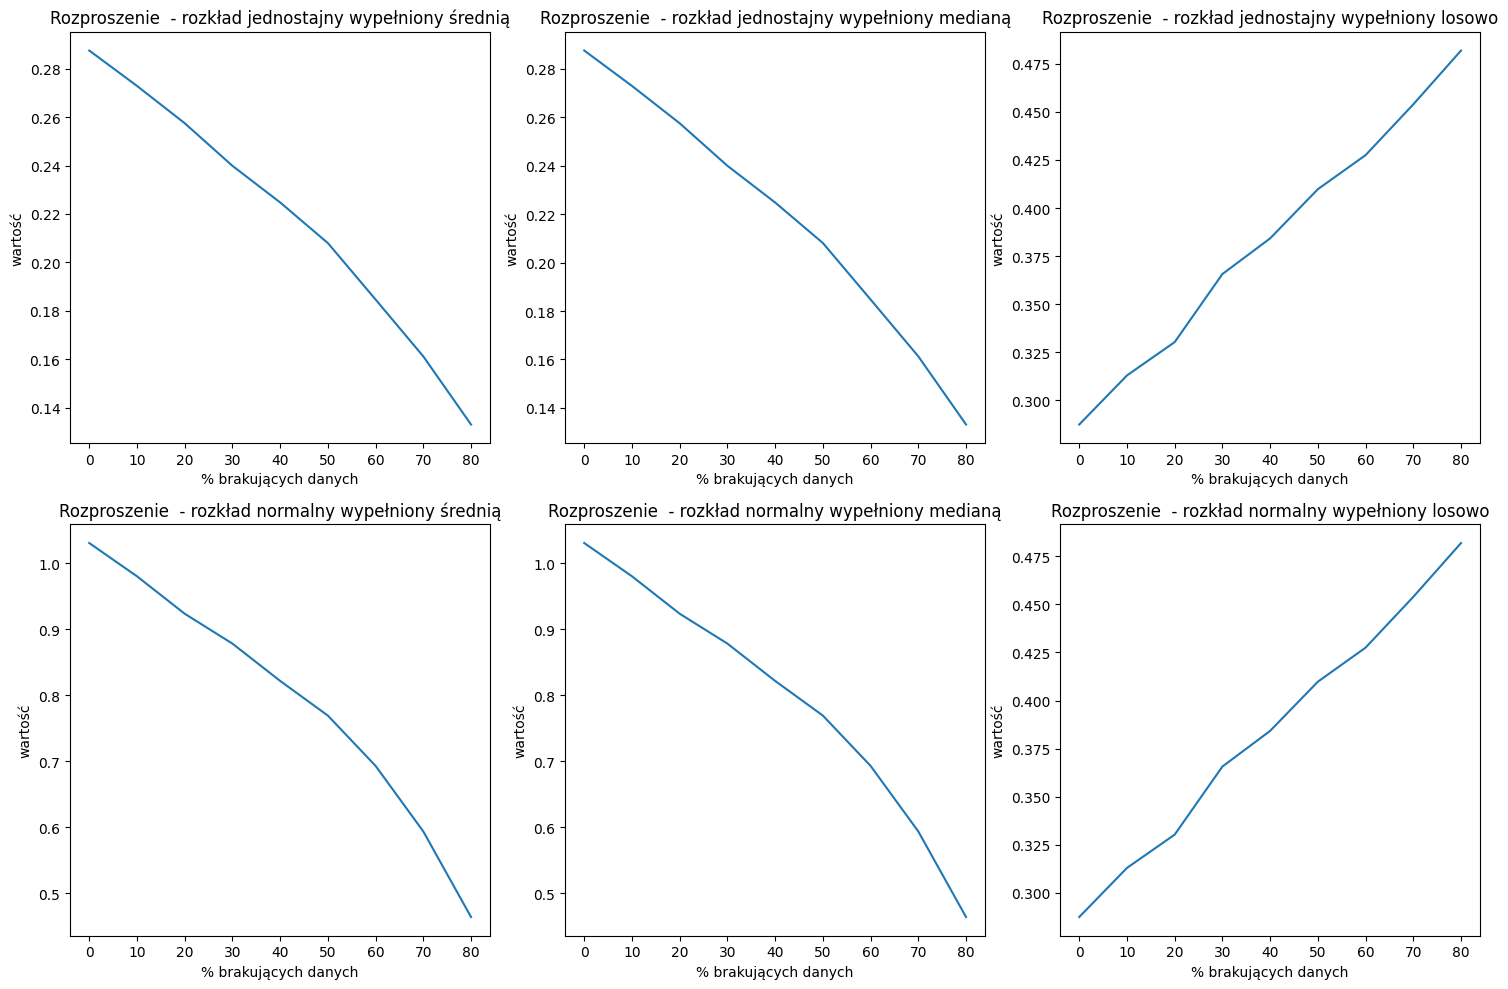

In [ ]:
def visualize_dispersion(dataframes):
    for df in dataframes:
      df = add_mising_percentage(df)


    fig, axs = plt.subplots(2, 3, figsize=(15, 10))

    title = 'Rozproszenie '
    axs[0, 0].plot(dataframes[0]['Missing percentage'], dataframes[0]['std'])
    axs[0, 0].set_title(title + ' - rozkład jednostajny wypełniony średnią')

    axs[0, 1].plot(dataframes[1]['Missing percentage'], dataframes[1]['std'])
    axs[0, 1].set_title(title + ' - rozkład jednostajny wypełniony medianą')

    axs[0, 2].plot(dataframes[2]['Missing percentage'], dataframes[2]['std'])
    axs[0, 2].set_title(title + ' - rozkład jednostajny wypełniony losowo')

    axs[1, 0].plot(dataframes[3]['Missing percentage'], dataframes[3]['std'])
    axs[1, 0].set_title(title + ' - rozkład normalny wypełniony średnią')

    axs[1, 1].plot(dataframes[4]['Missing percentage'], dataframes[4]['std'])
    axs[1, 1].set_title(title + ' - rozkład normalny wypełniony medianą')

    axs[1, 2].plot(dataframes[5]['Missing percentage'], dataframes[5]['std'])
    axs[1, 2].set_title(title + ' - rozkład normalny wypełniony losowo')

    for ax in axs.flat:
        ax.set_xlabel('% brakujących danych')
        ax.set_ylabel('wartość')

    plt.subplots_adjust(wspace=5, hspace=5)
    plt.tight_layout()
    plt.show()

visualize_dispersion([subsets_uniform_mean_filled_describe,
                      subsets_uniform_median_filled_describe,
                      subsets_uniform_random_filled_describe,
                      subsets_normal_mean_filled_descirbe,
                      subsets_normal_median_filled_describe,
                      subsets_uniform_random_filled_describe])

# Wnioski



*   W przypadku, gdy wypełniamy braki danych średnią lub medianą, to rozproszenie rośnie wraz z większym procentem brakujących danych.
*   W przypadku wypełniania danych losowo jest dokładnie odwrotnie - rozproszenie rośnie wraz z większym procentem brakujących danych.
*   Jeżeli braki danych są wypełniane średnią lub medianą, to minimum i 25 percentyl rośnie wraz z większym procentem brakujących danych, natomiast maksimum i 75 percentyl maleje wraz z większym procentem  brakujących danych
*  Nie ma dużej różnicy pomiędzy wypełnianiem danych średnią, a medianą.
*   Jeśli braki danych wypełniane są losowo, to nie ma dużej zależności od procentu braków danych








